In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Import

In [75]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *
from pathlib import Path
from functools import partial
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import re, os
import random
import fastai

In [76]:
fastai.__version__

'1.0.55'

In [77]:
cv.__version__

'3.4.4'

# Preprocess

In [117]:
raw_dir = Path("raw")
    
raws = [raw_path for raw_path in raw_dir.ls() if ".tif" in raw_path.as_posix()]
labels = sorted([raw_path for raw_path in raws if "_label" in raw_path.name])
images = sorted([Path(re.sub(r'_label', '_image', raw_path.as_posix())) for raw_path in labels])

processed_dir = Path("processed")
# for f in processed_dir.ls(): os.remove(f)
    
l=224

In [118]:
print(labels.__len__())
print(images.__len__())

9
9


In [119]:
for image,label in zip(images,labels):
    print(image,label)

raw/F1_test_ch1_Z0011_R_BL_image.tif raw/F1_test_ch1_Z0011_R_BL_label.tif
raw/F1_test_ch1_Z0011_R_BR_image.tif raw/F1_test_ch1_Z0011_R_BR_label.tif
raw/F1_test_ch1_Z0011_R_UL_image.tif raw/F1_test_ch1_Z0011_R_UL_label.tif
raw/F1_test_ch1_Z0091_L_BL_image.tif raw/F1_test_ch1_Z0091_L_BL_label.tif
raw/F1_test_ch1_Z0091_L_BR_image.tif raw/F1_test_ch1_Z0091_L_BR_label.tif
raw/F1_test_ch1_Z0091_L_UR_image.tif raw/F1_test_ch1_Z0091_L_UR_label.tif
raw/M2_test_Ch1_Z0071_R_BL_image.tif raw/M2_test_Ch1_Z0071_R_BL_label.tif
raw/M2_test_Ch1_Z0071_R_BR_image.tif raw/M2_test_Ch1_Z0071_R_BR_label.tif
raw/M2_test_Ch1_Z0071_R_UL_image.tif raw/M2_test_Ch1_Z0071_R_UL_label.tif


In [120]:
from tqdm import tqdm
empty = 0
popu = 0

for image_path,label_path in tqdm(zip(images,labels)):
    image = cv.imread(image_path.as_posix(), cv.COLOR_BGR2GRAY)
    label = cv.imread(label_path.as_posix(), cv.COLOR_BGR2GRAY)

    if image.shape != label.shape:
        raise ValueError(image_path.as_posix() + label_path.as_posix())
    i_max = image.shape[0]//l
    j_max = image.shape[1]//l

# If the cells were labelled as 255, or something else mistakenly, instead of 1.
    label[label!=0]=1

    for i in range(i_max):
        for j in range(j_max):
            cropped_image = image[l*i:l*(i+1), l*j:l*(j+1)]
            cropped_label = label[l*i:l*(i+1), l*j:l*(j+1)]
            
            if (cropped_label!=0).any():
                popu+=1
                cropped_image_path = processed_dir/(image_path.stem + "_i" + str(i) + "_j" + str(j) + image_path.suffix)
                cropped_label_path = processed_dir/(label_path.stem + "_i" + str(i) + "_j" + str(j) + label_path.suffix)
            else:
                empty+=1
                cropped_image_path = processed_dir/(image_path.stem + "_i" + str(i) + "_j" + str(j) + "_empty" + image_path.suffix)
                cropped_label_path = processed_dir/(label_path.stem + "_i" + str(i) + "_j" + str(j) + "_empty" + label_path.suffix)
            print(cropped_image_path, cropped_label_path)    
            cv.imwrite(cropped_image_path.as_posix(), cropped_image)
            cv.imwrite(cropped_label_path.as_posix(), cropped_label)
            
            if not os.path.isfile(cropped_image_path.as_posix()):
                print(cropped_image_path.as_posix())

0it [00:00, ?it/s]

processed/F1_test_ch1_Z0011_R_BL_image_i0_j0.tif processed/F1_test_ch1_Z0011_R_BL_label_i0_j0.tif
processed/F1_test_ch1_Z0011_R_BL_image_i0_j1.tif processed/F1_test_ch1_Z0011_R_BL_label_i0_j1.tif
processed/F1_test_ch1_Z0011_R_BL_image_i0_j2.tif processed/F1_test_ch1_Z0011_R_BL_label_i0_j2.tif
processed/F1_test_ch1_Z0011_R_BL_image_i1_j0.tif processed/F1_test_ch1_Z0011_R_BL_label_i1_j0.tif
processed/F1_test_ch1_Z0011_R_BL_image_i1_j1.tif processed/F1_test_ch1_Z0011_R_BL_label_i1_j1.tif
processed/F1_test_ch1_Z0011_R_BL_image_i1_j2.tif processed/F1_test_ch1_Z0011_R_BL_label_i1_j2.tif
processed/F1_test_ch1_Z0011_R_BL_image_i2_j0.tif processed/F1_test_ch1_Z0011_R_BL_label_i2_j0.tif
processed/F1_test_ch1_Z0011_R_BL_image_i2_j1.tif processed/F1_test_ch1_Z0011_R_BL_label_i2_j1.tif
processed/F1_test_ch1_Z0011_R_BL_image_i2_j2.tif processed/F1_test_ch1_Z0011_R_BL_label_i2_j2.tif


1it [00:00,  1.70it/s]

processed/F1_test_ch1_Z0011_R_BR_image_i0_j0.tif processed/F1_test_ch1_Z0011_R_BR_label_i0_j0.tif
processed/F1_test_ch1_Z0011_R_BR_image_i0_j1.tif processed/F1_test_ch1_Z0011_R_BR_label_i0_j1.tif
processed/F1_test_ch1_Z0011_R_BR_image_i0_j2.tif processed/F1_test_ch1_Z0011_R_BR_label_i0_j2.tif
processed/F1_test_ch1_Z0011_R_BR_image_i1_j0.tif processed/F1_test_ch1_Z0011_R_BR_label_i1_j0.tif
processed/F1_test_ch1_Z0011_R_BR_image_i1_j1.tif processed/F1_test_ch1_Z0011_R_BR_label_i1_j1.tif


2it [00:01,  1.79it/s]

processed/F1_test_ch1_Z0011_R_BR_image_i1_j2_empty.tif processed/F1_test_ch1_Z0011_R_BR_label_i1_j2_empty.tif
processed/F1_test_ch1_Z0011_R_BR_image_i2_j0.tif processed/F1_test_ch1_Z0011_R_BR_label_i2_j0.tif
processed/F1_test_ch1_Z0011_R_BR_image_i2_j1.tif processed/F1_test_ch1_Z0011_R_BR_label_i2_j1.tif
processed/F1_test_ch1_Z0011_R_BR_image_i2_j2_empty.tif processed/F1_test_ch1_Z0011_R_BR_label_i2_j2_empty.tif
processed/F1_test_ch1_Z0011_R_UL_image_i0_j0.tif processed/F1_test_ch1_Z0011_R_UL_label_i0_j0.tif
processed/F1_test_ch1_Z0011_R_UL_image_i0_j1.tif processed/F1_test_ch1_Z0011_R_UL_label_i0_j1.tif
processed/F1_test_ch1_Z0011_R_UL_image_i0_j2.tif processed/F1_test_ch1_Z0011_R_UL_label_i0_j2.tif
processed/F1_test_ch1_Z0011_R_UL_image_i1_j0.tif processed/F1_test_ch1_Z0011_R_UL_label_i1_j0.tif
processed/F1_test_ch1_Z0011_R_UL_image_i1_j1.tif processed/F1_test_ch1_Z0011_R_UL_label_i1_j1.tif
processed/F1_test_ch1_Z0011_R_UL_image_i1_j2.tif processed/F1_test_ch1_Z0011_R_UL_label_i1_j2.

3it [00:01,  2.02it/s]

processed/F1_test_ch1_Z0011_R_UL_image_i2_j1.tif processed/F1_test_ch1_Z0011_R_UL_label_i2_j1.tif
processed/F1_test_ch1_Z0011_R_UL_image_i2_j2.tif processed/F1_test_ch1_Z0011_R_UL_label_i2_j2.tif
processed/F1_test_ch1_Z0091_L_BL_image_i0_j0.tif processed/F1_test_ch1_Z0091_L_BL_label_i0_j0.tif
processed/F1_test_ch1_Z0091_L_BL_image_i0_j1.tif processed/F1_test_ch1_Z0091_L_BL_label_i0_j1.tif
processed/F1_test_ch1_Z0091_L_BL_image_i0_j2.tif processed/F1_test_ch1_Z0091_L_BL_label_i0_j2.tif


4it [00:01,  2.16it/s]

processed/F1_test_ch1_Z0091_L_BL_image_i1_j0.tif processed/F1_test_ch1_Z0091_L_BL_label_i1_j0.tif
processed/F1_test_ch1_Z0091_L_BL_image_i1_j1.tif processed/F1_test_ch1_Z0091_L_BL_label_i1_j1.tif
processed/F1_test_ch1_Z0091_L_BL_image_i1_j2.tif processed/F1_test_ch1_Z0091_L_BL_label_i1_j2.tif
processed/F1_test_ch1_Z0091_L_BL_image_i2_j0_empty.tif processed/F1_test_ch1_Z0091_L_BL_label_i2_j0_empty.tif
processed/F1_test_ch1_Z0091_L_BL_image_i2_j1.tif processed/F1_test_ch1_Z0091_L_BL_label_i2_j1.tif
processed/F1_test_ch1_Z0091_L_BL_image_i2_j2.tif processed/F1_test_ch1_Z0091_L_BL_label_i2_j2.tif
processed/F1_test_ch1_Z0091_L_BR_image_i0_j0.tif processed/F1_test_ch1_Z0091_L_BR_label_i0_j0.tif
processed/F1_test_ch1_Z0091_L_BR_image_i0_j1.tif processed/F1_test_ch1_Z0091_L_BR_label_i0_j1.tif
processed/F1_test_ch1_Z0091_L_BR_image_i0_j2.tif processed/F1_test_ch1_Z0091_L_BR_label_i0_j2.tif
processed/F1_test_ch1_Z0091_L_BR_image_i1_j0.tif processed/F1_test_ch1_Z0091_L_BR_label_i1_j0.tif
processe

5it [00:02,  2.22it/s]

processed/F1_test_ch1_Z0091_L_BR_image_i1_j2.tif processed/F1_test_ch1_Z0091_L_BR_label_i1_j2.tif
processed/F1_test_ch1_Z0091_L_BR_image_i2_j0_empty.tif processed/F1_test_ch1_Z0091_L_BR_label_i2_j0_empty.tif
processed/F1_test_ch1_Z0091_L_BR_image_i2_j1_empty.tif processed/F1_test_ch1_Z0091_L_BR_label_i2_j1_empty.tif
processed/F1_test_ch1_Z0091_L_BR_image_i2_j2.tif processed/F1_test_ch1_Z0091_L_BR_label_i2_j2.tif
processed/F1_test_ch1_Z0091_L_UR_image_i0_j0.tif processed/F1_test_ch1_Z0091_L_UR_label_i0_j0.tif
processed/F1_test_ch1_Z0091_L_UR_image_i0_j1.tif processed/F1_test_ch1_Z0091_L_UR_label_i0_j1.tif
processed/F1_test_ch1_Z0091_L_UR_image_i0_j2.tif processed/F1_test_ch1_Z0091_L_UR_label_i0_j2.tif
processed/F1_test_ch1_Z0091_L_UR_image_i1_j0.tif processed/F1_test_ch1_Z0091_L_UR_label_i1_j0.tif
processed/F1_test_ch1_Z0091_L_UR_image_i1_j1.tif processed/F1_test_ch1_Z0091_L_UR_label_i1_j1.tif
processed/F1_test_ch1_Z0091_L_UR_image_i1_j2.tif processed/F1_test_ch1_Z0091_L_UR_label_i1_j2.

6it [00:02,  2.25it/s]

processed/F1_test_ch1_Z0091_L_UR_image_i2_j0.tif processed/F1_test_ch1_Z0091_L_UR_label_i2_j0.tif
processed/F1_test_ch1_Z0091_L_UR_image_i2_j1.tif processed/F1_test_ch1_Z0091_L_UR_label_i2_j1.tif
processed/F1_test_ch1_Z0091_L_UR_image_i2_j2.tif processed/F1_test_ch1_Z0091_L_UR_label_i2_j2.tif
processed/M2_test_Ch1_Z0071_R_BL_image_i0_j0.tif processed/M2_test_Ch1_Z0071_R_BL_label_i0_j0.tif
processed/M2_test_Ch1_Z0071_R_BL_image_i0_j1.tif processed/M2_test_Ch1_Z0071_R_BL_label_i0_j1.tif


7it [00:02,  2.64it/s]

processed/M2_test_Ch1_Z0071_R_BL_image_i0_j2.tif processed/M2_test_Ch1_Z0071_R_BL_label_i0_j2.tif
processed/M2_test_Ch1_Z0071_R_BL_image_i1_j0.tif processed/M2_test_Ch1_Z0071_R_BL_label_i1_j0.tif
processed/M2_test_Ch1_Z0071_R_BL_image_i1_j1.tif processed/M2_test_Ch1_Z0071_R_BL_label_i1_j1.tif
processed/M2_test_Ch1_Z0071_R_BL_image_i1_j2.tif processed/M2_test_Ch1_Z0071_R_BL_label_i1_j2.tif
processed/M2_test_Ch1_Z0071_R_BL_image_i2_j0.tif processed/M2_test_Ch1_Z0071_R_BL_label_i2_j0.tif
processed/M2_test_Ch1_Z0071_R_BL_image_i2_j1.tif processed/M2_test_Ch1_Z0071_R_BL_label_i2_j1.tif
processed/M2_test_Ch1_Z0071_R_BL_image_i2_j2.tif processed/M2_test_Ch1_Z0071_R_BL_label_i2_j2.tif


8it [00:03,  2.78it/s]

processed/M2_test_Ch1_Z0071_R_BR_image_i0_j0.tif processed/M2_test_Ch1_Z0071_R_BR_label_i0_j0.tif
processed/M2_test_Ch1_Z0071_R_BR_image_i0_j1.tif processed/M2_test_Ch1_Z0071_R_BR_label_i0_j1.tif
processed/M2_test_Ch1_Z0071_R_BR_image_i0_j2.tif processed/M2_test_Ch1_Z0071_R_BR_label_i0_j2.tif
processed/M2_test_Ch1_Z0071_R_BR_image_i1_j0.tif processed/M2_test_Ch1_Z0071_R_BR_label_i1_j0.tif
processed/M2_test_Ch1_Z0071_R_BR_image_i1_j1.tif processed/M2_test_Ch1_Z0071_R_BR_label_i1_j1.tif
processed/M2_test_Ch1_Z0071_R_BR_image_i1_j2.tif processed/M2_test_Ch1_Z0071_R_BR_label_i1_j2.tif
processed/M2_test_Ch1_Z0071_R_BR_image_i2_j0.tif processed/M2_test_Ch1_Z0071_R_BR_label_i2_j0.tif
processed/M2_test_Ch1_Z0071_R_BR_image_i2_j1.tif processed/M2_test_Ch1_Z0071_R_BR_label_i2_j1.tif
processed/M2_test_Ch1_Z0071_R_BR_image_i2_j2.tif processed/M2_test_Ch1_Z0071_R_BR_label_i2_j2.tif
processed/M2_test_Ch1_Z0071_R_UL_image_i0_j0.tif processed/M2_test_Ch1_Z0071_R_UL_label_i0_j0.tif
processed/M2_test_Ch

9it [00:03,  2.98it/s]


In [121]:
os.path.isfile("processed/M2_test_Ch1_Z0071_R_BR_image_i1_j1.tif")

True

In [122]:
print(popu)
print(empty)

76
5


In [123]:
processed_dir.ls().__len__()

162

# DataBunch

In [124]:
torch.cuda.set_device(0)

In [125]:
transforms = get_transforms(
    do_flip = True,
    flip_vert = True,
    max_zoom = 1, #consider
    max_rotate = 0,
    max_lighting = None,
    max_warp = None,
    p_affine = 0.75,
    p_lighting = 0.75)

In [129]:
get_label_from_image = lambda path: re.sub(r'_image_', '_label_', path.as_posix())
codes = ["NOT-CELL", "CELL"]

bs = 16

src = (
    SegmentationItemList.from_folder(processed_dir)
    .filter_by_func(lambda fname:'image' in Path(fname).name)
    .split_by_rand_pct(valid_pct=0.10, seed=2)
    .label_from_func(get_label_from_image, classes=codes)
)
data = (
    src.transform(transforms, tfm_y=True)
    .databunch(bs=bs)
    .normalize(imagenet_stats)
)

In [130]:
data

ImageDataBunch;

Train: LabelList (73 items)
x: SegmentationItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: SegmentationLabelList
ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224)
Path: processed;

Valid: LabelList (8 items)
x: SegmentationItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: SegmentationLabelList
ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224)
Path: processed;

Test: None

In [131]:
# https://www.kaggle.com/iafoss/hypercolumns-pneumothorax-fastai-0-831-lb
from fastai.callbacks import SaveModelCallback
from fastai.vision.learner import create_head, cnn_config, num_features_model, create_head
from fastai.callbacks.hooks import model_sizes, hook_outputs, dummy_eval, Hook, _hook_inner
from fastai.vision.models.unet import _get_sfs_idxs, UnetBlock

class Hcolumns(nn.Module):
    def __init__(self, hooks:Collection[Hook], nc:Collection[int]=None):
        super(Hcolumns,self).__init__()
        self.hooks = hooks
        self.n = len(self.hooks)
        self.factorization = None 
        if nc is not None:
            self.factorization = nn.ModuleList()
            for i in range(self.n):
                self.factorization.append(nn.Sequential(
                    conv2d(nc[i],nc[-1],3,padding=1,bias=True),
                    conv2d(nc[-1],nc[-1],3,padding=1,bias=True)))
                #self.factorization.append(conv2d(nc[i],nc[-1],3,padding=1,bias=True))
        
    def forward(self, x:Tensor):
        n = len(self.hooks)
        out = [F.interpolate(self.hooks[i].stored if self.factorization is None
            else self.factorization[i](self.hooks[i].stored), scale_factor=2**(self.n-i),
            mode='bilinear',align_corners=False) for i in range(self.n)] + [x]
        return torch.cat(out, dim=1)

class DynamicUnet_Hcolumns(SequentialEx):
    "Create a U-Net from a given architecture."
    def __init__(self, encoder:nn.Module, n_classes:int, blur:bool=False, blur_final=True, 
                 self_attention:bool=False,
                 y_range:Optional[Tuple[float,float]]=None,
                 last_cross:bool=True, bottle:bool=False, **kwargs):
        imsize = (256,256)
        sfs_szs = model_sizes(encoder, size=imsize)
        sfs_idxs = list(reversed(_get_sfs_idxs(sfs_szs)))
        self.sfs = hook_outputs([encoder[i] for i in sfs_idxs])
        x = dummy_eval(encoder, imsize).detach()

        ni = sfs_szs[-1][1]
        middle_conv = nn.Sequential(conv_layer(ni, ni*2, **kwargs),
                                    conv_layer(ni*2, ni, **kwargs)).eval()
        x = middle_conv(x)
        layers = [encoder, batchnorm_2d(ni), nn.ReLU(), middle_conv]

        self.hc_hooks = [Hook(layers[-1], _hook_inner, detach=False)]
        hc_c = [x.shape[1]]
        
        for i,idx in enumerate(sfs_idxs):
            not_final = i!=len(sfs_idxs)-1
            up_in_c, x_in_c = int(x.shape[1]), int(sfs_szs[idx][1])
            do_blur = blur and (not_final or blur_final)
            sa = self_attention and (i==len(sfs_idxs)-3)
            unet_block = UnetBlock(up_in_c, x_in_c, self.sfs[i], final_div=not_final, 
                blur=blur, self_attention=sa, **kwargs).eval()
            layers.append(unet_block)
            x = unet_block(x)
            self.hc_hooks.append(Hook(layers[-1], _hook_inner, detach=False))
            hc_c.append(x.shape[1])

        ni = x.shape[1]
        if imsize != sfs_szs[0][-2:]: layers.append(PixelShuffle_ICNR(ni, **kwargs))
        if last_cross:
            layers.append(MergeLayer(dense=True))
            ni += in_channels(encoder)
            layers.append(res_block(ni, bottle=bottle, **kwargs))
        hc_c.append(ni)
        layers.append(Hcolumns(self.hc_hooks, hc_c))
        layers += [conv_layer(ni*len(hc_c), n_classes, ks=1, use_activ=False, **kwargs)]
        if y_range is not None: layers.append(SigmoidRange(*y_range))
        super().__init__(*layers)

    def __del__(self):
        if hasattr(self, "sfs"): self.sfs.remove()
            
def unet_learner(data:DataBunch, arch:Callable, pretrained:bool=True, blur_final:bool=True,
        norm_type:Optional[NormType]=NormType, split_on:Optional[SplitFuncOrIdxList]=None, 
        blur:bool=False, self_attention:bool=False, y_range:Optional[Tuple[float,float]]=None, 
        last_cross:bool=True, bottle:bool=False, cut=None, 
        hypercolumns=True, **learn_kwargs:Any)->Learner:
    "Build Unet learner from `data` and `arch`."
    meta = cnn_config(arch)
    body = create_body(arch, pretrained, cut)
    M = DynamicUnet_Hcolumns if hypercolumns else DynamicUnet
    model = to_device(M(body, n_classes=data.c, blur=blur, blur_final=blur_final,
        self_attention=self_attention, y_range=y_range, norm_type=norm_type, 
        last_cross=last_cross, bottle=bottle), data.device)
    learn = Learner(data, model, **learn_kwargs)
    learn.split(ifnone(split_on, meta['split']))
    if pretrained: learn.freeze()
    apply_init(model[2], nn.init.kaiming_normal_)
    return learn

In [150]:
learn = unet_learner(
    data,
    models.resnet34,
    metrics=partial(dice, iou=True),
    model_dir='..')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-06
Min loss divided by 10: 4.37E-04


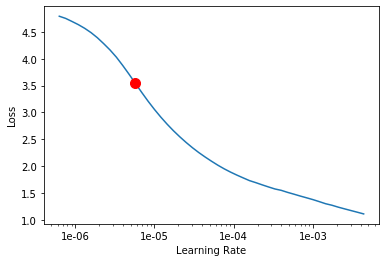

In [133]:
lr_find(learn)
learn.recorder.plot(suggestion=True)

In [151]:
lr = 5e-4
learn.fit_one_cycle(15, lr)

epoch,train_loss,valid_loss,dice,time
0,0.231057,0.099319,0.000000,00:03
1,0.197444,0.239626,0.000000,00:03
2,0.197837,0.177542,0.000000,00:03
3,0.162891,0.057791,0.083697,00:03
4,0.132940,0.060251,0.017964,00:03
5,0.110390,0.016913,0.379002,00:03
6,0.093829,0.020910,0.258053,00:03
7,0.081159,0.019366,0.265619,00:03
8,0.071169,0.016598,0.417368,00:03
9,0.063221,0.015305,0.366068,00:03


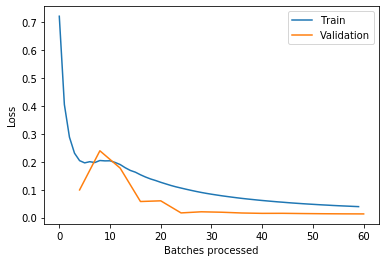

In [152]:
learn.recorder.plot_losses()

In [153]:
learn.save("stage1")

In [154]:
learn.load("stage1");

In [155]:
learn.unfreeze()

In [156]:
lrs = slice(lr/800,lr/8)

In [157]:
learn.fit_one_cycle(12, lrs, pct_start=0.8)
# learn.fit_one_cycle(12, lrs)

epoch,train_loss,valid_loss,dice,time
0,0.012447,0.013156,0.450648,00:03
1,0.012304,0.012899,0.458974,00:03
2,0.012304,0.012716,0.459060,00:03
3,0.012361,0.012469,0.469658,00:03
4,0.012150,0.012293,0.466074,00:03
5,0.012080,0.011862,0.483664,00:03
6,0.011808,0.011492,0.467277,00:03
7,0.011567,0.011418,0.442334,00:03
8,0.011352,0.011367,0.433962,00:03
9,0.011214,0.010338,0.495635,00:03


In [158]:
learn.save("stage2")

In [160]:
learn.export(file = "../models/2019-10-27_RESNET34-hcolumns_zdenka_channel1_prelim.pkl")

# Check

In [161]:
preds = learn.get_preds()

In [162]:
if learn.data.valid_ds.__len__() == preds[1].shape[0]:
    N = learn.data.valid_ds.__len__()
else:
    raise ValueError()

xs = [learn.data.valid_ds[i][0] for i in range(N)]
ys = [learn.data.valid_ds[i][1] for i in range(N)]
p0s = [Image(preds[0][i][0]) for i in range(N)]
p1s = [Image(preds[0][i][1]) for i in range(N)]
argmax = [Image(preds[0][i].argmax(dim=0)) for i in range(N)]

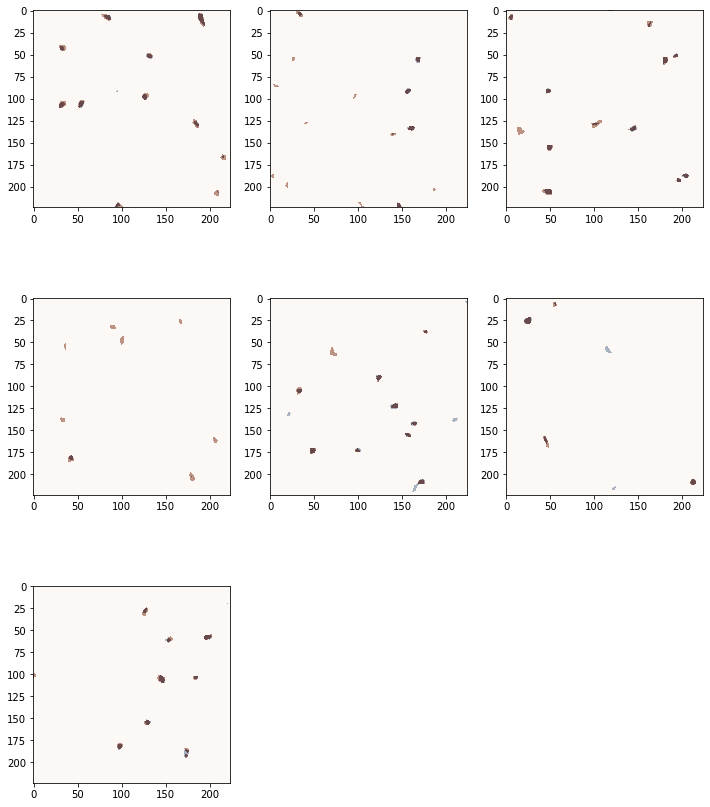

In [164]:
ncol = 3
nrow = N//ncol + 1
fig=plt.figure(figsize=(12, nrow*5))
for i in range(1,N):
    fig.add_subplot(nrow, ncol, i)
#     plt.imshow(xs[i-1].px.permute(1, 2, 0), cmap = "Oranges", alpha=0.5)
    plt.imshow(argmax[i-1].px, cmap = "Blues", alpha=0.7)
#     plt.imshow(p1s[i-1].px, cmap = "Blues", alpha=0.7)
    plt.imshow(ys[i-1].px[0], cmap = "Oranges", alpha=0.5)
plt.savefig('2019-10-27_zdenka_channel1_prelim_results.png')
plt.show()

In [165]:
!jupyter nbconvert zdenka-ch1-train.ipynb --to html --output nbs/2019-10-27_zdenka_channel1_prelim.html

[NbConvertApp] Converting notebook zdenka-ch1-train.ipynb to html
[NbConvertApp] Writing 415473 bytes to nbs/2019-10-27_zdenka_channel1_prelim.html
